##### Imports

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from deepface import DeepFace
faceCascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")


# Detecting on an image

In [2]:
def detect_face_emotion_image(img):
    # Load the image
    img = cv.imread(img)

    # Predict
    predictions = DeepFace.analyze(img)

    # Detect the face
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for(x, y, w, h) in faces: 
        cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

    # Draw a rectangle on the face borders
    font = cv.FONT_HERSHEY_SIMPLEX
    height = img.shape[0]
    width = img.shape[1]

    cv.putText(
        img,
        predictions['dominant_emotion'],
        (width//2-50,20),
        font, 1,
        (0, 255, 0),
        cv.LINE_4
    );

    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.11it/s]


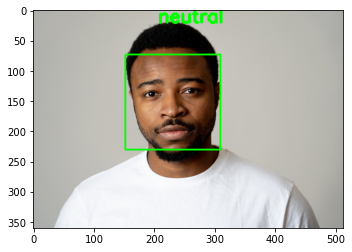

In [3]:
detect_face_emotion_image('neutral_man.jpg')

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.58it/s]


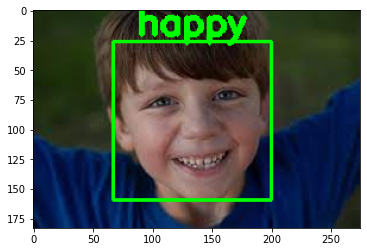

In [4]:
detect_face_emotion_image('happy_boy.jpg')

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.69it/s]


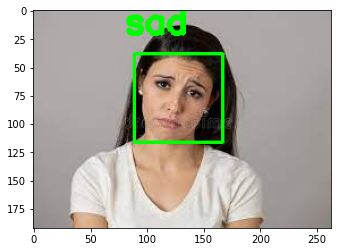

In [5]:
detect_face_emotion_image('sad_woman.jpg')

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.42it/s]


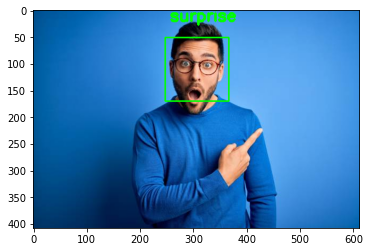

In [6]:
detect_face_emotion_image('surprised_kid.jpg')

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.12it/s]


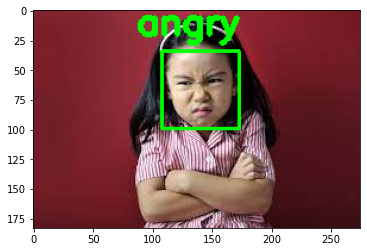

In [7]:
detect_face_emotion_image('angry_girl.jpg')

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.25it/s]


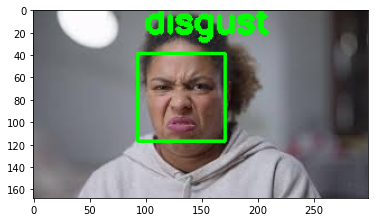

In [8]:
detect_face_emotion_image('disgust_woman.jpg')

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.50it/s]


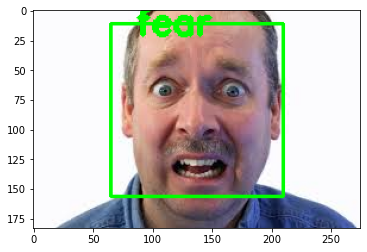

In [9]:
detect_face_emotion_image('fear_man.jpg')

# Detecting on live stream video

In [10]:
cap = cv.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")

while True:
    ret, frame = cap.read()
    frame = cv.flip(frame, 1)
    
    result = DeepFace.analyze(frame)
    
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for(x, y, w, h) in faces: 
        cv.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)

    # Draw a rectangle on the face borders
    font = cv.FONT_HERSHEY_SIMPLEX
    height = frame.shape[0]
    width = frame.shape[1]

    cv.putText(
        frame,
        result['dominant_emotion'],
        (width//2-50,50),
        font, 1,
        (0, 255, 0),
        2,
        cv.LINE_4
    );
    cv.imshow('Demo Video', frame)
    if cv.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.00it/s]


KeyboardInterrupt: 